# Exploratory data analysis with SAT scores.
Dataset, Rate of participation and average SAT Scores in the United States.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
plt.style.use('fivethirtyeight')

import pandas as pd
sat_scores=pd.read_csv('.././assets/sat_scores.csv')

sat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


# Describe the data

In [9]:
sat_scores.shape #51 states plus the aggregate( 'ALL)

(52, 4)

In [6]:
sat_scores=sat_scores[sat_scores.State !='All'] #"remove All"

In [5]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [7]:
sat_scores.isnull().sum()

State     0
Rate      0
Verbal    0
Math      0
dtype: int64

In [9]:
sat_scores.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


the Standard Deviation of Rate, Math and Verbal scores numeric column.

In [10]:
RX_=sat_scores.Rate.sum()/ sat_scores.Rate.count()
VX_=sat_scores.Verbal.sum()/ sat_scores.Verbal.count()
MX_=sat_scores.Math.sum()/ sat_scores.Math.count()

print 'Rate std   :  %f' % np.sqrt(sum([((x-RX_)**2) for x in sat_scores.Rate])/(sat_scores.Rate.count()-1))
print 'Verbal std : %f'% np.sqrt(sum([((x-VX_)**2) for x in sat_scores.Verbal])/(sat_scores.Verbal.count()-1))
print 'Math Std   : %f' % np.sqrt(sum([((x-MX_)**2) for x in sat_scores.Math])/(sat_scores.Math.count()-1))


Rate std   :  27.549955
Verbal std : 33.361655
Math Std   : 36.290495


# Histograms

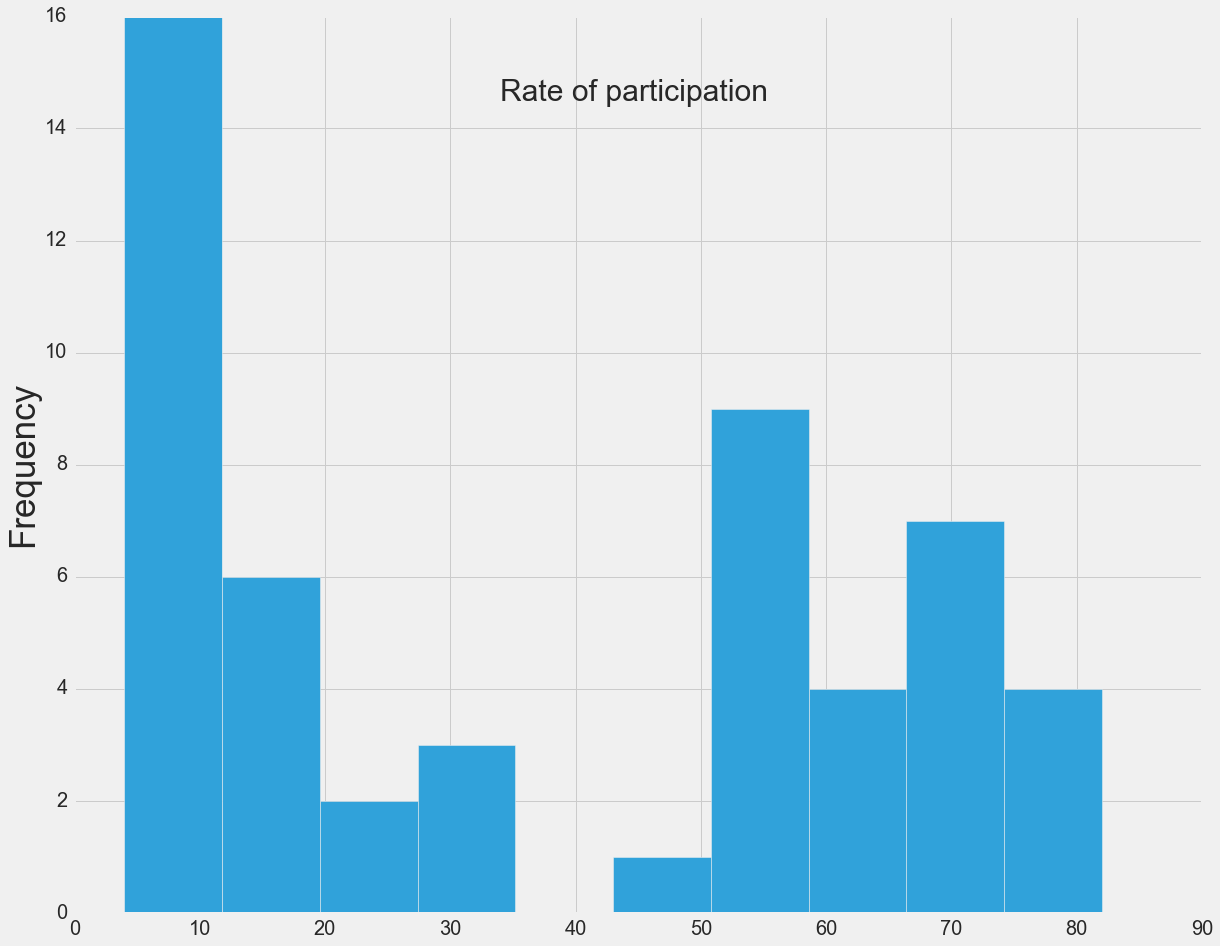

In [10]:
fig=sat_scores.Rate.plot(kind='hist', figsize=(18,15),fontsize=20) # panda plot
ax=plt.gca() 
ax.set_title('Rate of participation ',fontsize=30, y=.900)
ax.set_ylabel("Frequency", fontsize=35, x=1.8)
#Bimodal

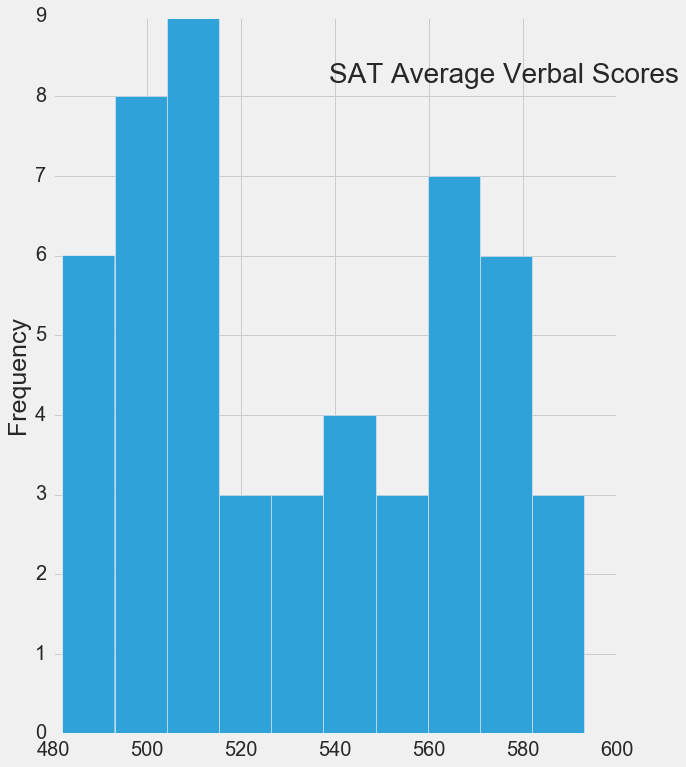

In [12]:
fig=sat_scores.Verbal.plot(kind='hist', figsize=(9,12),fontsize=20) # panda plot
ax=plt.gca() 
ax.set_title('SAT Average Verbal Scores',fontsize=28, y=.900, x=.80)
ax.set_ylabel("Frequency", fontsize=25, x=1.8)
#Bimodal

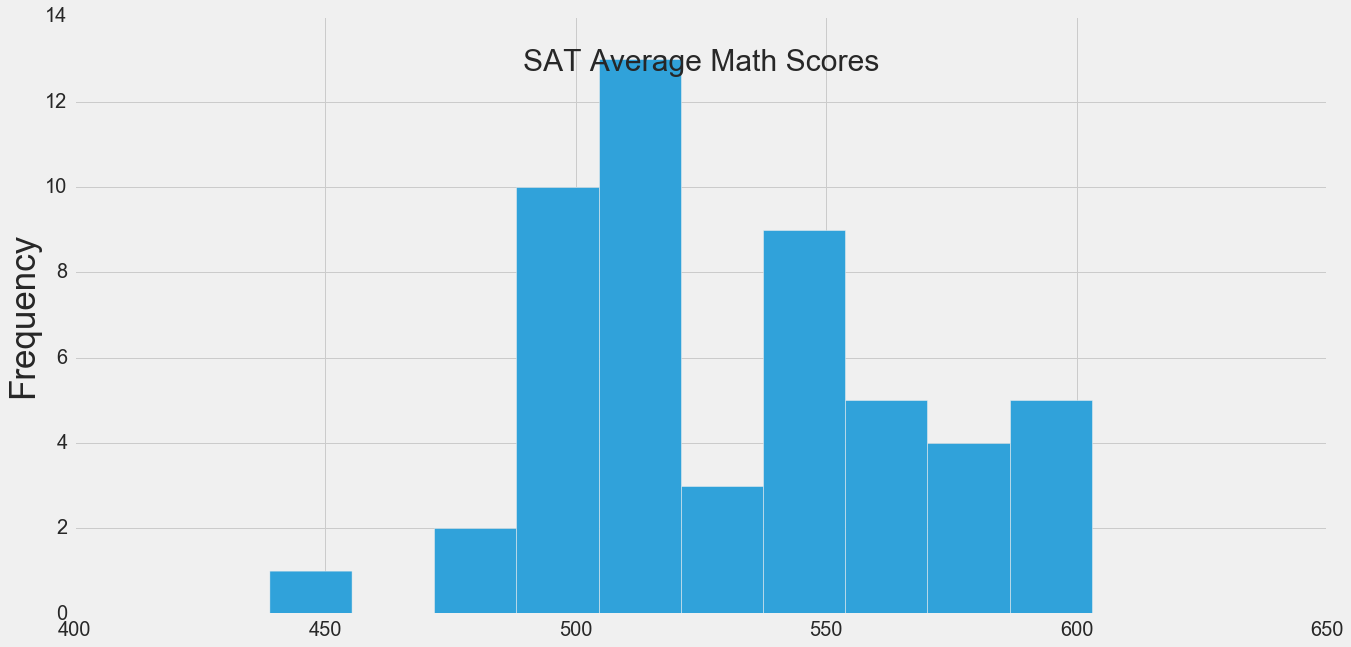

In [11]:
fig=sat_scores.Math.plot(kind='hist', figsize=(20,10),fontsize=20) # panda plot
ax=plt.gca() 
ax.set_title('SAT Average Math Scores',fontsize=30, y=.900)
ax.set_ylabel("Frequency", fontsize=35, x=1.8)
#skewed to the left

##### 17. What is the typical assumption for data distribution?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12673eb90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126a5db10>]], dtype=object)

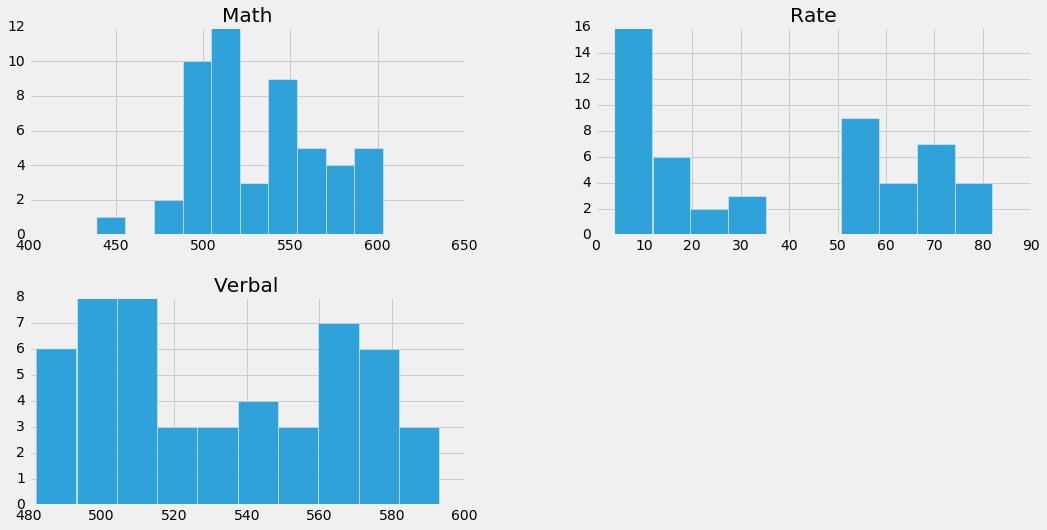

In [174]:
sat_scores.hist(figsize=(16,8))

Math is symmetrical normal distribution

Rate is negatively skewed normal distribution

Verbal is bi modal normal distribution

we will later test normality to verify this assumption


# scatterplots.  


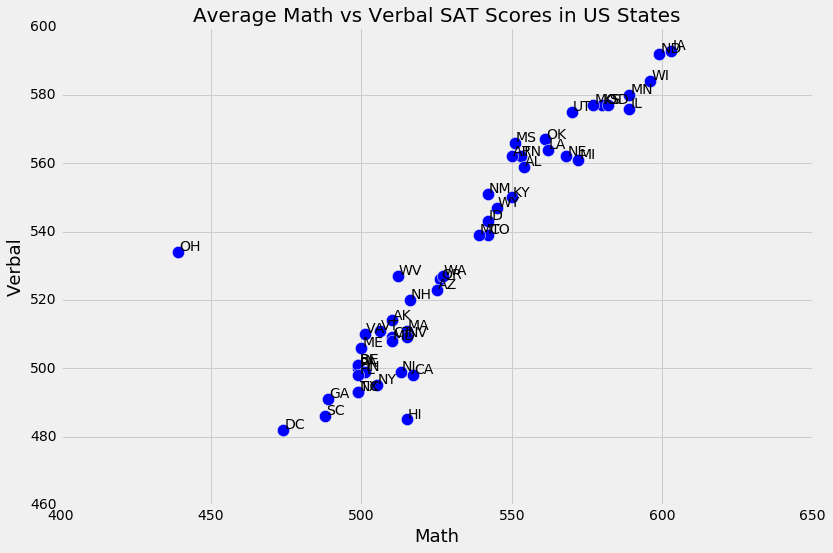

In [19]:
#point_shapes = ['+' if r == 'full' else 's' if r == 'associate' else '2' for r in rank]

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
axes = fig.gca()
axes.scatter(sat_scores.Math, sat_scores.Verbal, s=150,
                    label=' ')

axes.set_title('Average Math vs Verbal SAT Scores in US States', fontsize=20)
axes.set_xlabel('Math', fontsize=18)
axes.set_ylabel('Verbal', fontsize=18)

for i, txt in enumerate(sat_scores.State):
    axes.annotate(txt, (sat_scores.Math[i]+.4,sat_scores.Verbal[i]+.4))


Strong positive correlation between Math and Verbal. The higher the Maths score the higher the Verbal score. 
in other words, when Math Scores insrease Verbal scores increase.

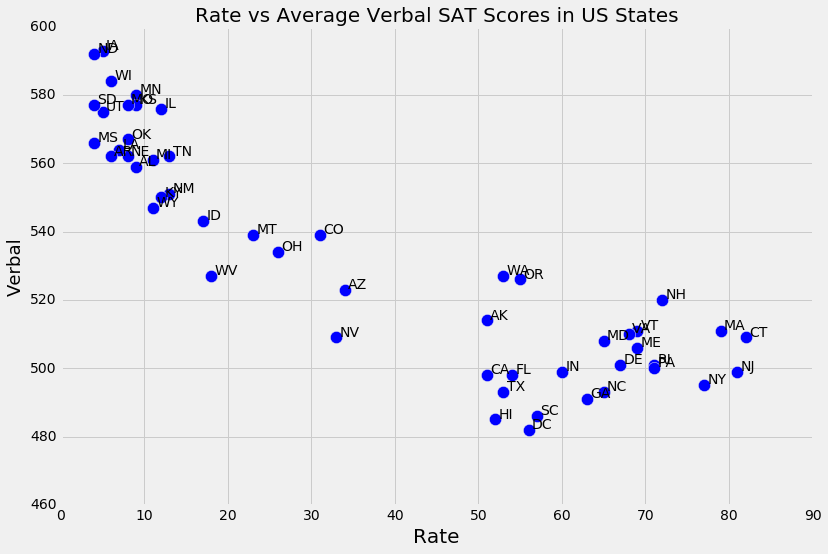

In [18]:
#point_shapes = ['+' if r == 'full' else 's' if r == 'associate' else '2' for r in rank]

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
axes = fig.gca()
axes.scatter(sat_scores.Rate, sat_scores.Verbal, s=150,
                    label=' ')

axes.set_title( 'Rate vs Average Verbal SAT Scores in US States', fontsize=20)
axes.set_xlabel('Rate', fontsize=20)
axes.set_ylabel('Verbal', fontsize=18)
for i, txt in enumerate(sat_scores.State):
    axes.annotate(txt, (sat_scores.Rate[i]+.4,sat_scores.Verbal[i]+.4))

Negative correlation between participation rate and Verbal. The higher the participation rate the lower Verbal scores. 
in other words, when participation Rate insrease Verbal scores decrease.

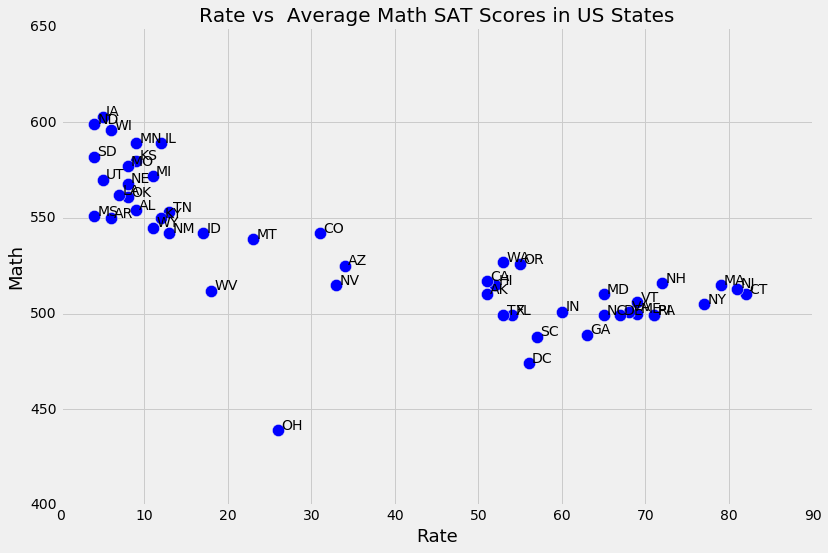

In [17]:
#point_shapes = ['+' if r == 'full' else 's' if r == 'associate' else '2' for r in rank]

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
axes = fig.gca()
axes.scatter(sat_scores.Rate, sat_scores.Math, s=150,
                    label=' ')

axes.set_title('Rate vs  Average Math SAT Scores in US States', fontsize=20)
axes.set_xlabel('Rate', fontsize=18)
axes.set_ylabel('Math', fontsize=18)

for i, txt in enumerate(sat_scores.State):
    axes.annotate(txt, (sat_scores.Rate[i]+.4,sat_scores.Math[i]+.4))
    
    

Some negative correlation between participation rate and Math. The higher the participation rate the lower Verbal scores. in other words, when participation Rate insrease Maths scores decrease.

In [5]:
#math and verbal correlation
sat_scores.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


# Box plots 

{'boxes': [<matplotlib.patches.PathPatch at 0x11c57e9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11c58d6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c59a9d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c59a390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11c57ee10>,
  <matplotlib.lines.Line2D at 0x11c5a6b10>]}

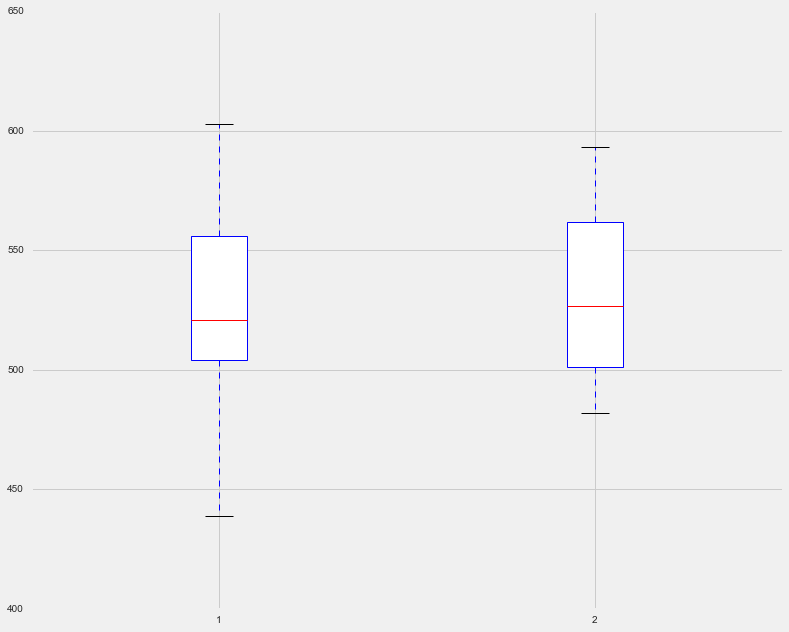

In [29]:
#sat_scores.plot.box()
fig = plt.figure(figsize=(12,10))
axes = fig.gca()
axes.boxplot([sat_scores.Math,sat_scores.Verbal], patch_artist=True)

{'boxes': [<matplotlib.patches.PathPatch at 0x131030c10>],
 'caps': [<matplotlib.lines.Line2D at 0x13103f990>,
 'fliers': [<matplotlib.lines.Line2D at 0x13104ac90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x13104a650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x13103f0d0>,
  <matplotlib.lines.Line2D at 0x13103f2d0>]}

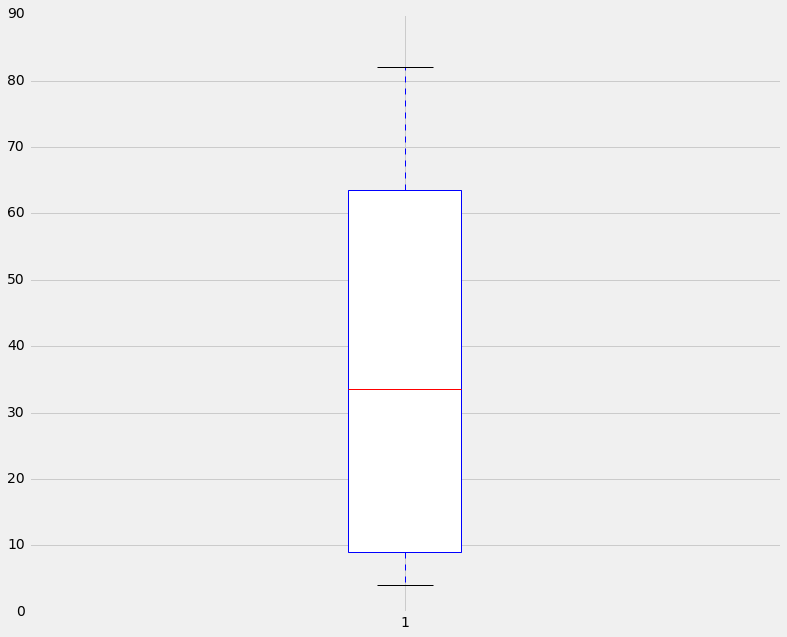

In [252]:
fig = plt.figure(figsize=(12,10))
axes = fig.gca()
axes.boxplot([sat_scores.Rate], patch_artist=True)

# Distribution plots

NormaltestResult(statistic=0.54841552274003325, pvalue=0.76017412403590801)

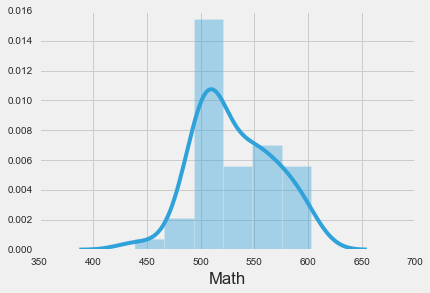

In [37]:
sns.distplot(sat_scores.Math)
scipy.stats.mstats.normaltest(sat_scores.Math)
#at p >0.05 we accept the hypothesis that Math scores are normally distributed.

NormaltestResult(statistic=21.525355863641892, pvalue=2.117524109156281e-05)

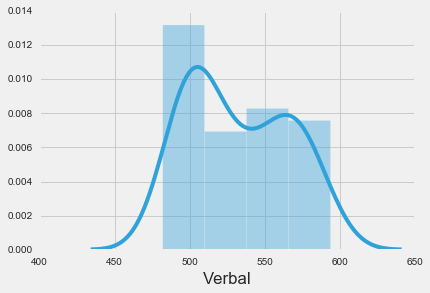

In [38]:
sns.distplot(sat_scores.Verbal)
scipy.stats.mstats.normaltest(sat_scores.Verbal)
#at p >0.05 we reject the hypothesis that Verbal scores are normally distributed.

NormaltestResult(statistic=76.221209546114068, pvalue=2.8104421166109834e-17)

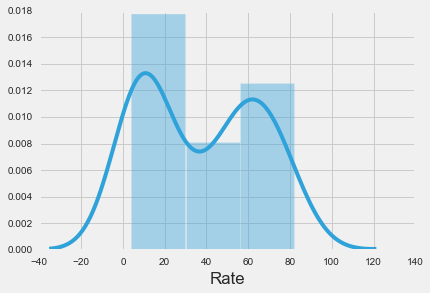

In [39]:
sns.distplot(sat_scores.Rate)
scipy.stats.mstats.normaltest(sat_scores.Rate)
#at p <0.05 we reject the hypothesis that participation rates are normally distributed.

# heat map for each variable using a map of the US. 

<img src=".././assets/SAT scores geographically.png">

There seems to be a positive correlation between Verbal and Math Scores, and a negative correlation between Math, Verbal and rate of paticipation. Perhaps the states' highschool population data would show why participation rate is low in states where the Maths and Verbal scores are high? There are also differences in states scores and need population and other economic and school information to understand the differences in scores.